### MSDS422 - Assignment 1
##### Exploring and Visualizing Data

## Setup

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Turn off Future Warnings 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Downloading the data

In [74]:
def download_data(file_path="https://opendata.ecdc.europa.eu/covid19/casedistribution/csv"):
    df = pd.read_csv(file_path)
    # Convert the dateRep column to datetime so that we could use it as our index column
    df["dateRep"] = pd.to_datetime(df["dateRep"])
    # Change the index of the dataframe to use the dateRep column. 
    df = df.set_index("dateRep")
    return df

In [201]:
df = download_data()
df.head()

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-20,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649


In [202]:
# Renaming two columns to make it more intuitive and easier to use throughout  the EDA
df = df.rename(columns={"countriesAndTerritories": "country", "popData2019":"population"})

## Descriptive Statistics

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 43927 entries, 2020-09-20 to 2020-03-21
Data columns (total 11 columns):
day                                                           43927 non-null int64
month                                                         43927 non-null int64
year                                                          43927 non-null int64
cases                                                         43927 non-null int64
deaths                                                        43927 non-null int64
country                                                       43927 non-null object
geoId                                                         43737 non-null object
countryterritoryCode                                          43863 non-null object
population                                                    43863 non-null float64
continentExp                                                  43927 non-null object
Cumulative_number_for_14_days_of_COVID

In [204]:
df.describe()

,day,month,year,cases,deaths,population,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,43927.000000,43927.000000,43927.000000,43927.000000,43927.000000,4.386300e+04,41146.000000
mean,15.667608,5.635076,2019.998475,701.981059,21.804130,4.284112e+07,33.162436
std,8.760930,2.213146,0.039025,4372.394543,126.420562,1.577985e+08,76.350870
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.355982e+06,0.373990
50%,16.000000,6.000000,2020.000000,9.000000,0.000000,8.082359e+06,4.599023
75%,23.000000,7.000000,2020.000000,151.000000,3.000000,2.916192e+07,26.774247
max,31.000000,12.000000,2020.000000,97894.000000,4928.000000,1.433784e+09,1058.225943


In [205]:
df.shape

(43927, 11)

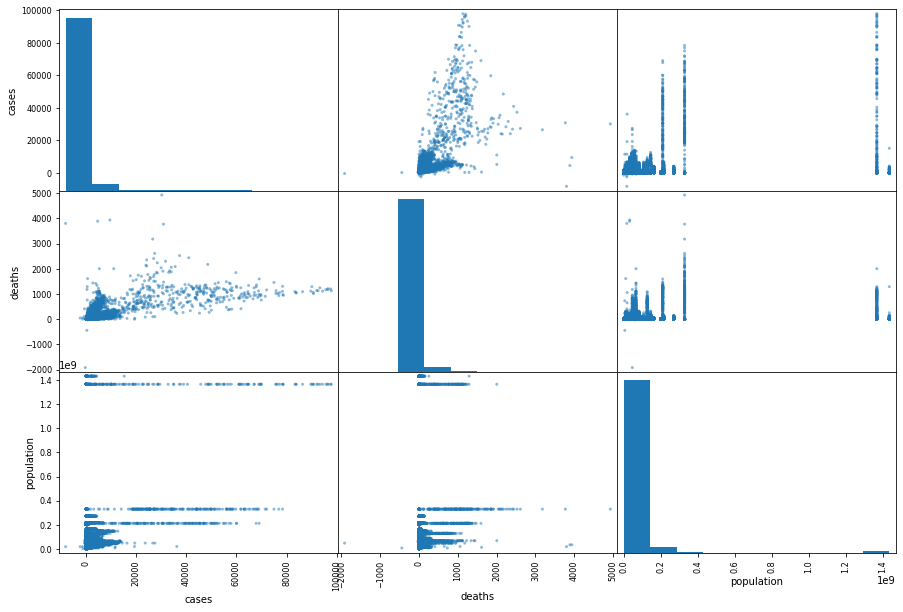

In [206]:
from pandas.plotting import scatter_matrix
attributes = [ "cases", "deaths", "population" ]
scatter_matrix(df[attributes], figsize=(15,10));

In [210]:
# Here I want to look at a summary of cases and deaths per country by grouping by country and then summing cases and deaths. 
total_cases_per_country = df.groupby(["country"])["cases"].sum().reset_index()
total_deaths_per_country = df.groupby(["country"])["deaths"].sum().reset_index()

In [218]:
df.head()

,day,month,year,cases,deaths,country,geoId,countryterritoryCode,population,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
dateRep,,,,,,,,,,,
2020-09-20,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649


In [ ]:
df.groupby(["country"])["cases"].sum()

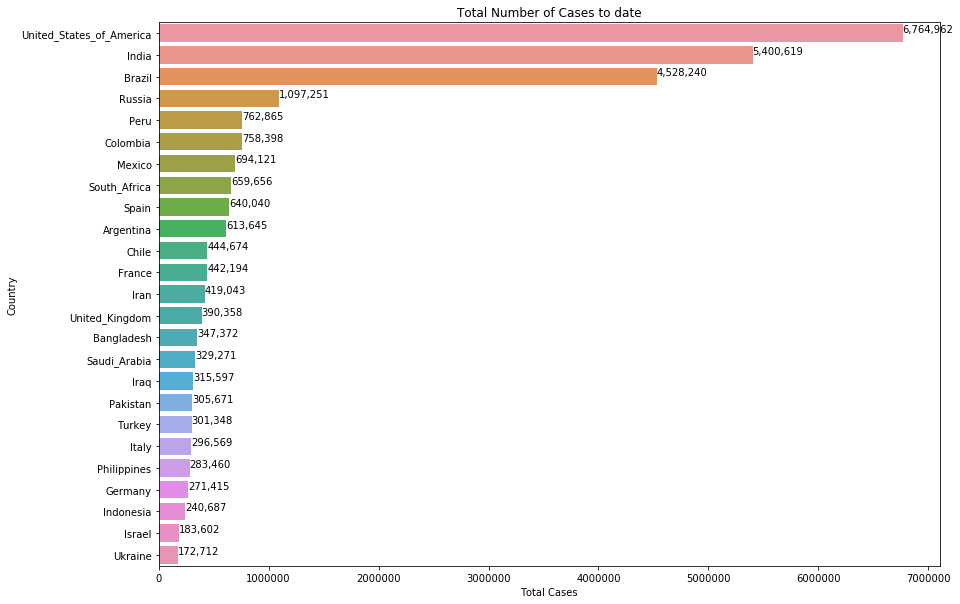

In [215]:
top25_cases = total_cases_per_country.sort_values(by=["cases"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top25_cases["cases"], top25_cases["country"])

for i, (value,name) in enumerate(zip(top25_cases["cases"], top25_cases["country"])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)

plt.title("Total Number of Cases to date")
plt.xlabel("Total Cases")
plt.ylabel("Country")
plt.show()
# https://towardsdatascience.com/covid-19-data-visualization-using-python-3c8bcfaeff5f

Looking at the above chart, it looks like the US has the highest number of COVID cases to day. Let's look at the total number of deaths per country and see what countries lead in the total number of deaths.

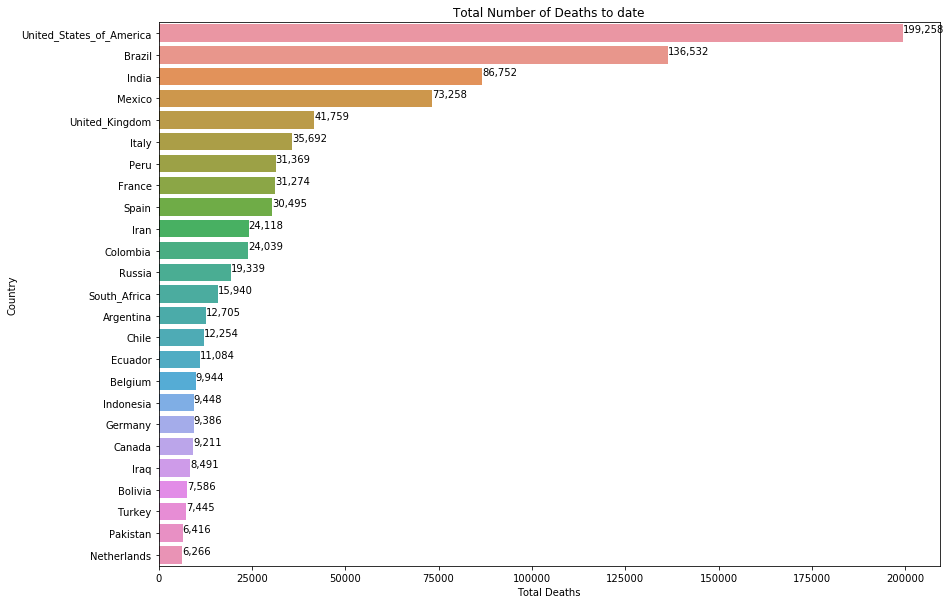

In [217]:
top25_deaths = total_deaths_per_country.sort_values(by=["deaths"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top25_deaths["deaths"], top25_deaths["country"])

for i, (value,name) in enumerate(zip(top25_deaths["deaths"], top25_deaths["country"])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.title("Total Number of Deaths to date")
plt.xlabel("Total Deaths")
plt.ylabel("Country")
plt.show()


As we can see, US, India and Brazil are still leading the world in total COVID deaths to date. It's an interesting perspective, but let's dive deep and what's the total number of deaths per million population of each country. In order to do that, we should engineer some new features. 

## Feature Engineering:

In [311]:
df_new = df.copy()
# Rescale the population to be in terms of millions
df_new["pop_in_millions"] = df_new["population"]/(10**6)
# Calculate the number of Covid cases per every million of pupulation
df_new["cases_per_million"] = df_new["cases"]/df_new["pop_in_millions"]
# Calculate death rates per million
df_new["deaths_per_million"] =  df_new["deaths"] / df_new["pop_in_millions"]
df_new.head()

,day,month,year,cases,deaths,country,geoId,countryterritoryCode,population,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,pop_in_millions,cases_per_million,deaths_per_million
dateRep,,,,,,,,,,,,,,
2020-09-20,20,9,2020,125,4,Afghanistan,AF,AFG,38041757.0,Asia,1.892657,38.041757,3.285863,0.105148
2020-09-19,19,9,2020,47,1,Afghanistan,AF,AFG,38041757.0,Asia,1.616645,38.041757,1.235484,0.026287
2020-09-18,18,9,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,1.535155,38.041757,0.000000,0.000000
2020-09-17,17,9,2020,17,0,Afghanistan,AF,AFG,38041757.0,Asia,1.653446,38.041757,0.446877,0.000000
2020-09-16,16,9,2020,40,10,Afghanistan,AF,AFG,38041757.0,Asia,1.708649,38.041757,1.051476,0.262869


In [312]:
# I am going to create a new dataframe that shows aggregated monthly data so that we could visualize the trend well. 
monthly_cases = df_new.groupby(["country", "month"])["cases_per_million"].sum().reset_index()

In [313]:
# Selecting a few countries to work with: 
#countries = ['Canada', 'Germany', 'United_Kingdom', 'China','India','Brazil','Italy','United_States_of_America']
countries = ['China','India','Brazil','Italy','United_States_of_America', 'Qatar']
# Filtering out the daily cases for the countries that we want to study. 
df_select = df_new[df_new["country"].isin(countries)]
# Filtering out the monthly dataframe for the countries we want to study. 
df_select_monthly = monthly_cases[monthly_cases["country"].isin(countries)]

In [314]:
df_select_monthly.head()

,country,month,cases_per_million
214,Brazil,1,0.000000
215,Brazil,2,0.004738
216,Brazil,3,21.691592
217,Brazil,4,348.652773
218,Brazil,5,1991.371513


In [315]:
# Preparing the dataframes by pivoting our original data frame and having each country as a separate column. 
df1 = df_select.pivot(columns="country", values="cases_per_million")
df2 = df_select_monthly.pivot(index="month", columns="country", values="cases_per_million")

In [316]:
df1.head()

country,Brazil,China,India,Italy,Qatar,United_States_of_America
dateRep,,,,,,
2019-12-31,0.000000,0.018831,0.000000,0.000000,0.000000,0.000000
2020-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-02,0.000000,1.461169,0.000000,0.000000,0.000000,0.003039
2020-01-03,0.004738,0.400339,0.000000,3.976173,0.353098,0.009117
2020-01-04,5.392099,0.037663,0.106849,67.147622,31.072667,75.966773


In [317]:
df2.head()

country,Brazil,China,India,Italy,Qatar,United_States_of_America
month,,,,,,
1,0.000000,6.756249,0.000732,0.049702,0.000000,0.018233
2,0.004738,48.571483,0.001464,14.662138,0.000000,0.182335
3,21.691592,2.012856,0.913337,1670.837617,244.697255,500.065463
4,348.652773,1.187766,23.271799,1687.421572,4191.632201,2659.928041
5,1991.371513,0.128332,109.112312,481.663663,15076.599421,2219.850741


In [318]:
df3 = df2.copy()

In [319]:
def draw_chart(df, title, x_label, y_label):
    from matplotlib.pyplot import figure
    figure(figsize=(15,10))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(df.index, df["Brazil"])
    plt.plot(df.index, df["China"])
    plt.plot(df.index, df["India"])
    plt.plot(df.index, df["United_States_of_America"])
    plt.plot(df.index, df["Italy"])
    plt.plot(df.index, df["Qatar"])
    plt.legend(countries)
    plt.show();

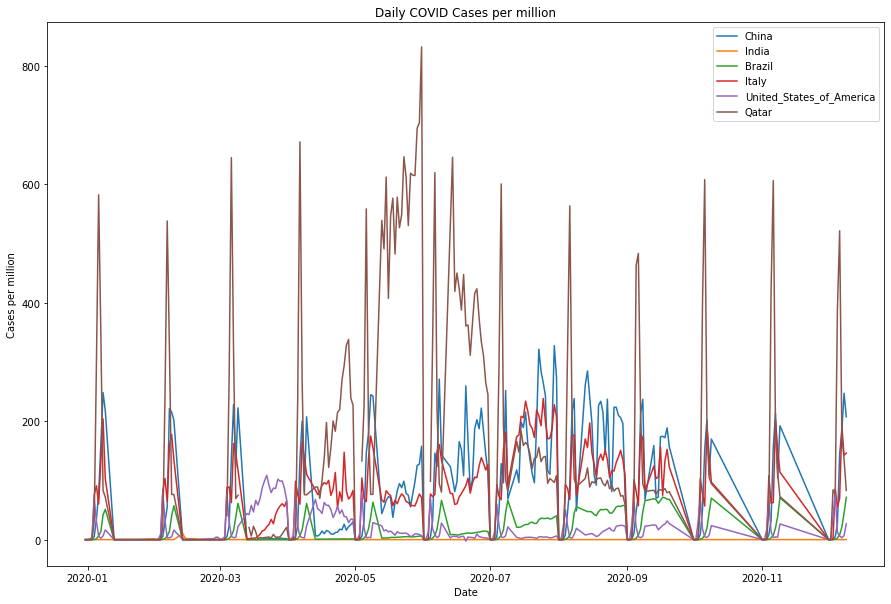

In [320]:
# Display the daily cases for the countries that we selected earlier. 
draw_chart(df1, "Daily COVID Cases per million", "Date", "Cases per million")

In [321]:
# Display the monthly cases for the countries we chose. 

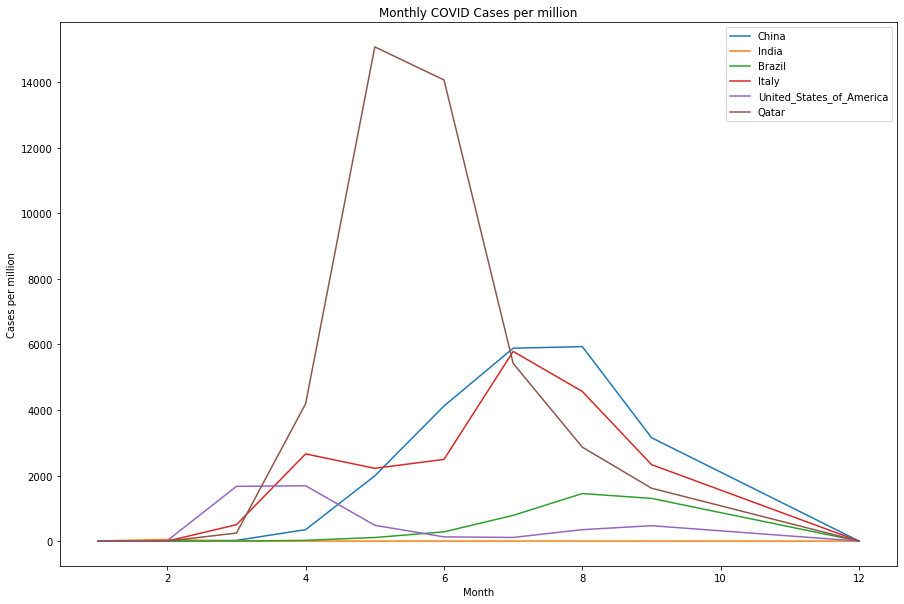

In [322]:
draw_chart(df2, "Monthly COVID Cases per million", "Month", "Cases per million")

Upon review, we see that India's cases are not even showing in the line chart, while other countries have huge spikes. I suspect that there might issues with our Y axis. Let's confirm this assumption by displaying monthly cases only for India. 

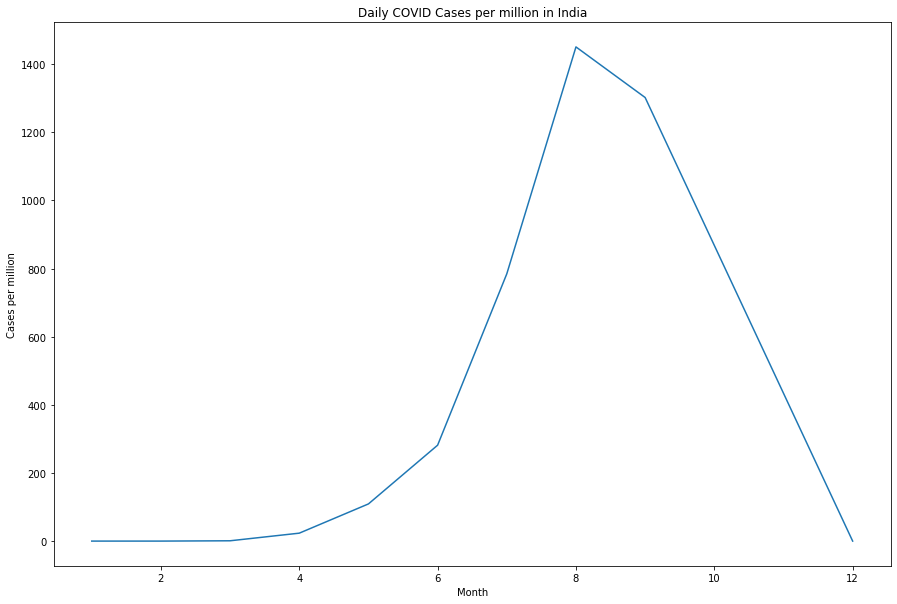

In [323]:
figure(figsize=(15,10))
plt.title("Daily COVID Cases per million in India")
plt.xlabel("Month")
plt.ylabel("Cases per million")
plt.plot(df2.index, df2["India"])
plt.show();

As suspected, there is an issue with our scale. We can solve for this by rescaling normlizing the number of cases using Scikit-learn's MinMaxScaler(). After we apply the scaler, our values will come in range of 0-1. We can regraph our monthly data to see cases for India as well. 

## Scaling Monthly Cases per Million:

In [324]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df3 = df2.copy()
df3[['Brazil','China','India','Italy','United_States_of_America', 'Qatar']] = scaler.fit_transform(df3[['Brazil',
                                                                                                        'China',
                                                                                                        'India',
                                                                                                        'Italy',
                                                                                                        'United_States_of_America',
                                                                                                        'Qatar']])

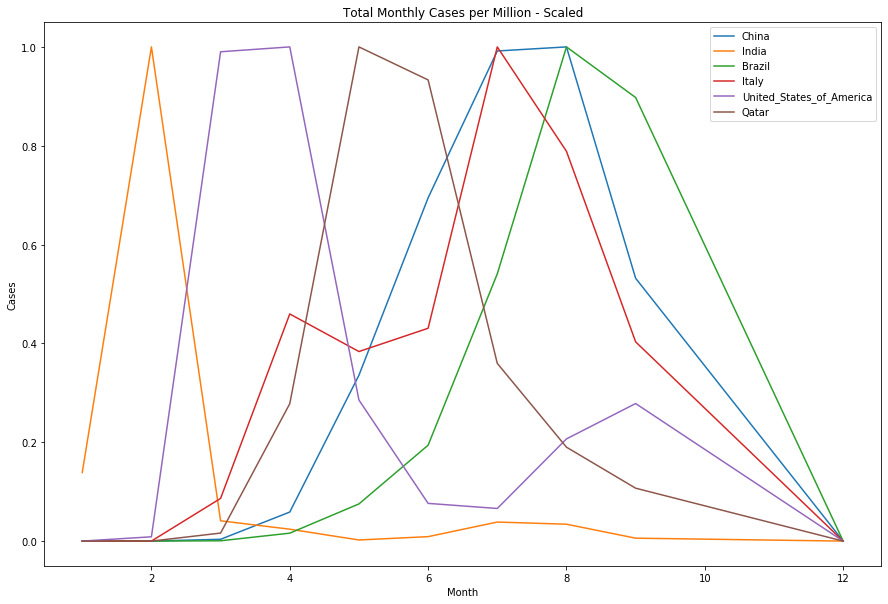

In [325]:
draw_chart(df3, "Total Monthly Cases per Million - Scaled", "Month", "Cases")

## Extras: 
Here, I just want to display our original cases and deaths per million and want to see which countries are leading the charts. 

In [326]:
total_cases_per_country_per_mil = df_new.groupby(["country"])["cases_per_million"].sum().reset_index()
total_deaths_per_country_per_mil = df_new.groupby(["country"])["deaths_per_million"].sum().reset_index()

In [344]:
# Creating a joined data frame so we could use it later for a scatter plot. 
df_joined = total_cases_per_country_per_mil.merge(total_deaths_per_country_per_mil, on='country', how='left')

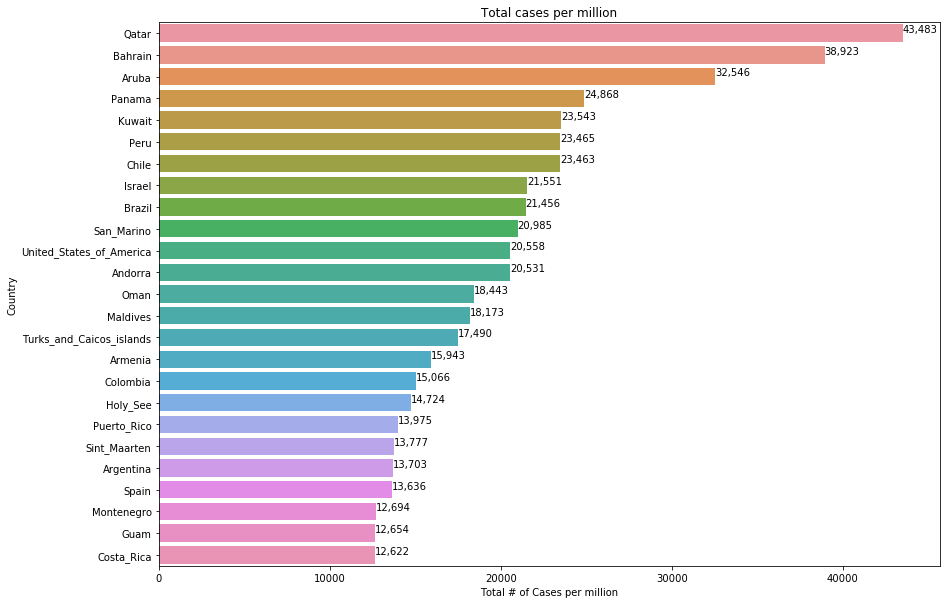

In [331]:
top25_cases_per_million = total_cases_per_country_per_mil.sort_values(by=["cases_per_million"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top25_cases_per_million["cases_per_million"], top25_cases_per_million["country"])

for i, (value,name) in enumerate(zip(top25_cases_per_million["cases_per_million"], top25_cases_per_million["country"])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.title("Total cases per million")
plt.xlabel("Total # of Cases per million")
plt.ylabel("Country")
plt.show()

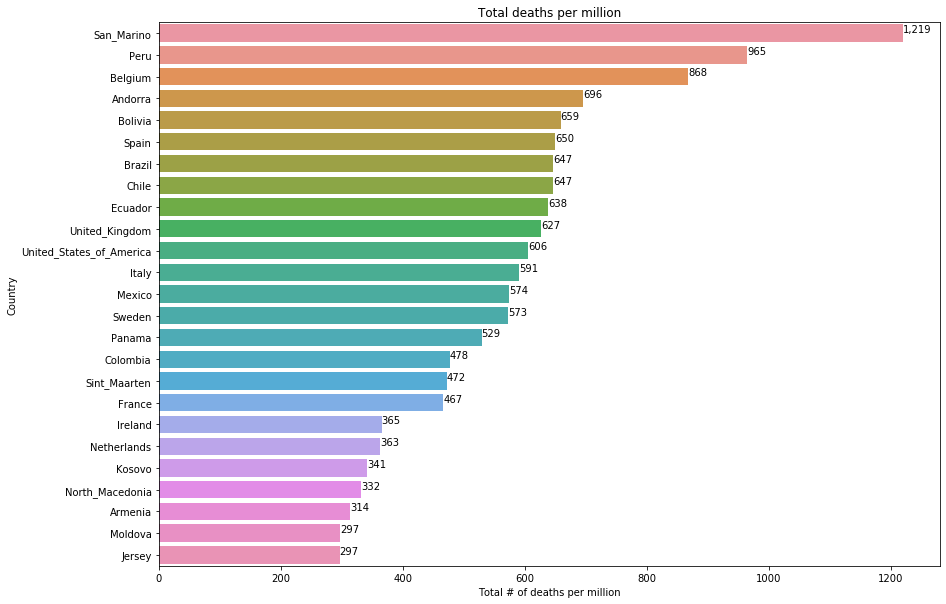

In [332]:
top25_cases_per_million = total_deaths_per_country_per_mil.sort_values(by=["deaths_per_million"], ascending=False).head(25)
# Generate a Barplot
plt.figure(figsize=(14,10))
plot = sns.barplot(top25_cases_per_million["deaths_per_million"], top25_cases_per_million["country"])

for i, (value,name) in enumerate(zip(top25_cases_per_million["deaths_per_million"], top25_cases_per_million["country"])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
    plt.title("Total deaths per million")
    plt.xlabel("Total # of deaths per million")
    plt.ylabel("Country")
plt.show()

# Result
As we can see from our comparisons, if we went with total number of cases or deaths, than US would lead the world, however, if change perspective and look more in depth and study the cases per million of population, we will realize that Qatar is leading the world in total number of cases per million and San San Marino is leading in total deaths per million population. 

## Cases vs Deaths

I want to visualize the relationship between total deaths per million with total cases per million

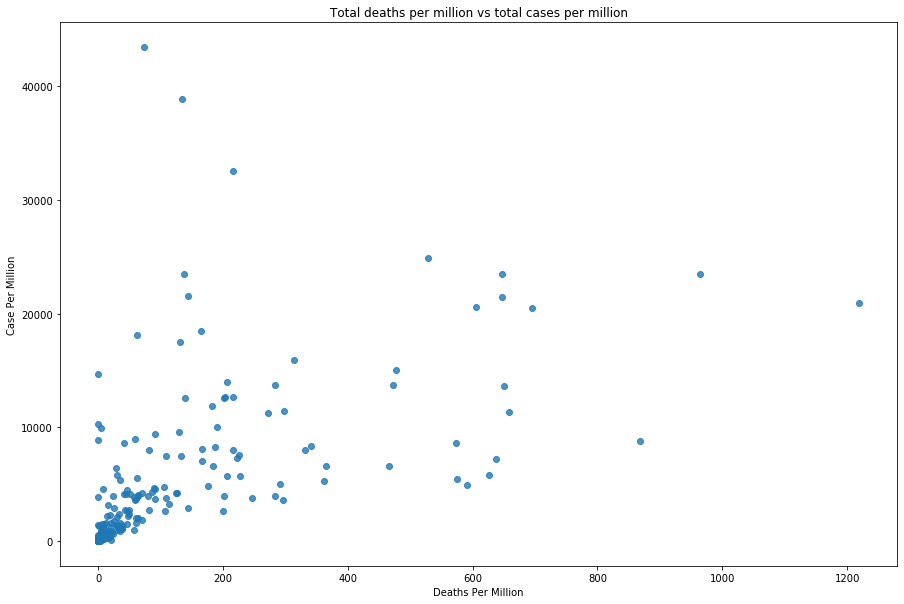

In [348]:
from matplotlib.pyplot import figure
figure(figsize=(15,10))
plt.scatter(df_joined['deaths_per_million'], df_joined['cases_per_million'], alpha=0.8)
plt.title("Total deaths per million vs total cases per million")
plt.xlabel("Deaths Per Million")
plt.ylabel("Case Per Million");